<p style = 'font-size:40px'> <strong>Charting Fundamentals</strong> </p>

<p style = 'font-size:30px'> <strong>Subplots</strong> </p>

In [50]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

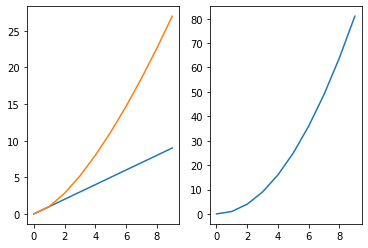

In [2]:
plt.figure(1)
# O método subplot deve receber três arumentos: o número de linhas, 
# colunas e a posição do próximo gráfico na figura.
plt.subplot(1, 2, 1)
y = np.arange(10) 
plt.plot(y)

# Nós podemos, no mesmo subplot, sobrepor vários gráficos.
plt.plot(y ** 1.5)

plt.subplot(1,2, 2)
plt.plot(y ** 2)

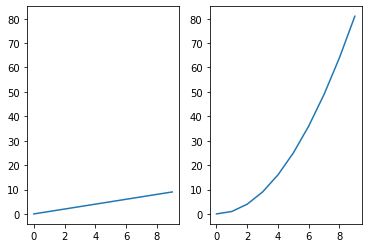

In [27]:
# Podemos aproveitar os eixos dos subplot para serem compartilhados.
plt.figure(2)
sub1 = plt.subplot(1, 2, 1)
plt.plot(y)

# Note, estamos passando o primeiro subplot como argumento do sharey de 'sub2'.
sub2 = plt.subplot(1,2, 2, sharey = sub1)
plt.plot(y ** 2)

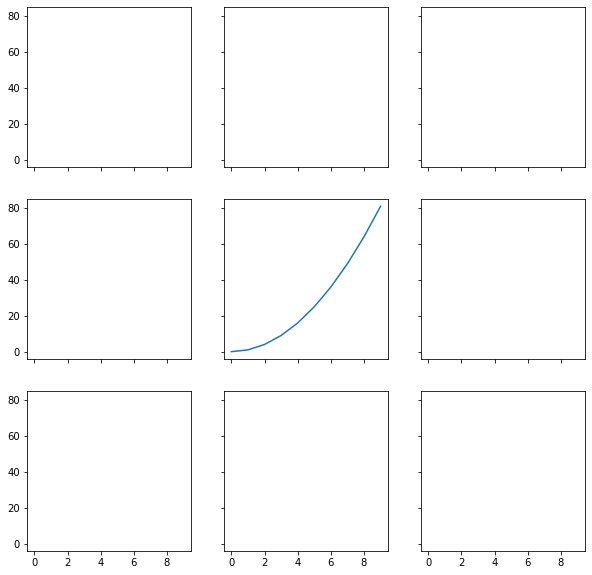

In [37]:
# Outra maneira de se criar subplots com o método plt.subplotS.

# É aqui que sharex e sharey possuem valores booleanos!
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex = True, 
                                                                        sharey =True,figsize = (10, 10))

ax5.plot(y ** 2)

<p style = 'font-size:30px'> <strong>Histograms</strong> </p>

* <p style = 'font-size:20px'> Mostram a frequência de um dado fenômeno.</p>

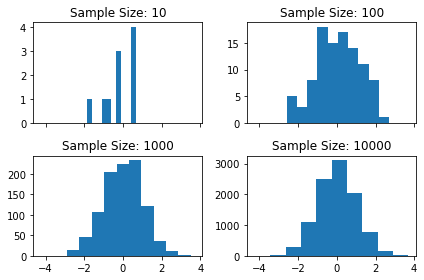

In [49]:
# Criando uma figura de subplots.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex = True)
# Uma lista com os subplots para facilitar a criação dos histogramas.
axs = [ax1, ax2, ax3, ax4]

# Loop para a criação dos histogramas.
for i in range(4):
    # Vamos criar vários gráficos de distribuição normal de tamanhos distintos.
    sample_size = 10 ** (i + 1)
    sample = np.random.normal(loc = 0.0, scale = 1, size = sample_size)
    axs[i].hist(sample)
    axs[i].set_title(f'Sample Size: {sample_size}')
    
# Podemos enxergar que conforme os tamnahos de amostra aumentam, os seus respectivos gráficos obtêm barras mais
# grossas.

# Isso porque, por padrão, os histogramas estão configurados para mostrar apenas 10 barras.

# Portanto, com um sample_size maior, o matplotlib terá que reunir um intervalo maior de valores do eixo
# x a fim de manter o número de barras definido.
plt.tight_layout()

<p style = 'font-size:30px'> <em>Gridspecs</em> </p>

<div style = 'font-size:20px'>
    <ul> 
        <li> Os gridspecs são grades para figuras do matplotlib. Eles podem ser utilizados para customizar o tamanho e posição de nossos gráficos.</li>
    </ul>

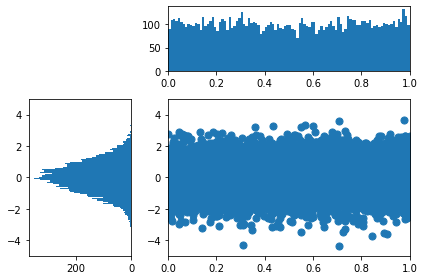

In [80]:
import matplotlib.gridspec as gridspec

# Criando uma figura para comportar os nossos gráficos.
plt.figure()
# Criando uma malha de gráficos 3x3
gspec = gridspec.GridSpec(3,3)
top_histogram = plt.subplot(gspec[0, 1:], sharex = scatter)
left_histogram = plt.subplot(gspec[1:, 0], sharey = scatter)
scatter = plt.subplot(gspec[1:, 1:])

Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
scatter.scatter(X,Y, s = 50)
scatter.set_xlim([0,1])
scatter.set_ylim([-5, 5])
left_histogram.hist(Y, bins = 100, orientation = 'horizontal')
left_histogram.invert_xaxis()
top_histogram.hist(X, bins = 100)
plt.tight_layout()

<p style = 'font-size:30px'> <strong>Box and Whisker plots</strong> </p>

In [81]:
random = np.random.random(size = 10000)
normal = np.random.normal(loc=0.0, scale = 1, size = 10000)
gamma = np.random.gamma(2, size = 10000)

In [87]:
df = pd.DataFrame({'random': random,
                  'normal':normal,
                  'gamma':gamma})
# Extraindo alguns dados estatísticos antes de plotarmos o gráfico.
df.describe()

,random,normal,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.497565,-0.003766,2.007262
std,0.290223,1.004269,1.425608
min,0.000169,-3.420994,0.014894
25%,0.244719,-0.681369,0.980682
50%,0.499917,0.000263,1.672332
75%,0.746313,0.671663,2.702867
max,0.999902,3.562408,11.180765


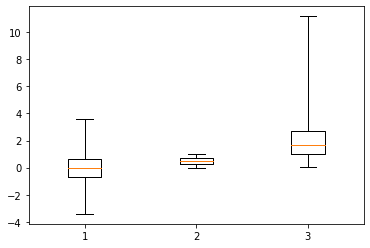

In [93]:
_ = plt.boxplot([df['normal'],df['random'], df['gamma']], whis = [0, 100])

<p style = 'font-size:30px'> <em>Gráficos dentro de gráficos</em> </p>

<div style = 'font-size:20px'>
    <ul>
        <li>O matplotlib nos possibilita customizar os nosso gráficos com a inserção de outros dentro de sua própria moldura.</li> 
    </ul>
    </div>

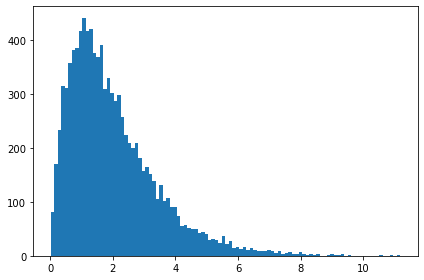

In [95]:
# Digamos que quiséssemos inserir esse histograma dentro da área de nosso boxplot. Como faríamos isso?
plt.hist(df['gamma'], bins = 100)
plt.tight_layout()

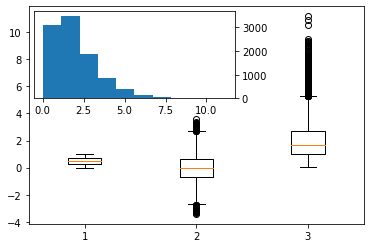

In [98]:
# Essa seção do matplotlib será responsável por isso.
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.figure()
_ = plt.boxplot([df['random'], df['normal'], df['gamma']])
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['gamma'])

# Vamos inverter a posição dos valores do eixo Y.
ax2.yaxis.tick_right()

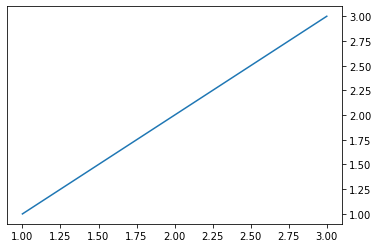

In [105]:
bar = plt.plot([1,2,3],[1,2,3])
ax = plt.gca()
ax.yaxis.tick_right()

<h1 style = 'font-size:40px'> <strong>Heatmaps</strong> </h1>

<div>
    <ul style = 'font-size:20px'>
        <li> Os mapas de calor podem ser utilizados na indicação de intensidade de um fenômeno.
        </li>
    </ul>
    </div>

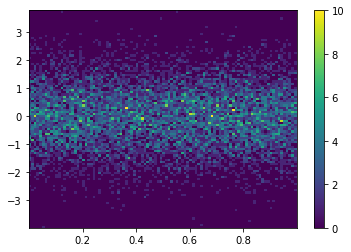

In [109]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=100)
plt.colorbar()

<h1 style = 'font-size:40px'> <strong>Animation</strong> </h1>

In [ ]:
# Achei o procedimento complicado, então deixarei o código da aula caso eu precise posteriormente.

In [116]:
%matplotlib inline

In [118]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [119]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

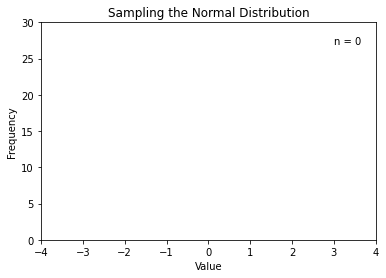

In [120]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

<h1 style = 'font-size:40px'> <strong>Interactivity</strong> </h1>

5

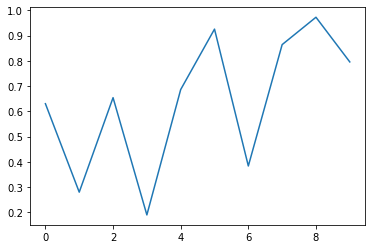

In [121]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [122]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.489661,0.099892,Mexico
1,0.821228,0.742548,India
2,0.694672,0.406297,Germany
3,0.722744,0.245562,UK
4,0.914427,0.509140,USA
5,0.205718,0.924139,Canada
6,0.726039,0.455042,Iraq
7,0.842850,0.714517,Brazil
8,0.943263,0.046046,China
9,0.780419,0.859069,Chile


5

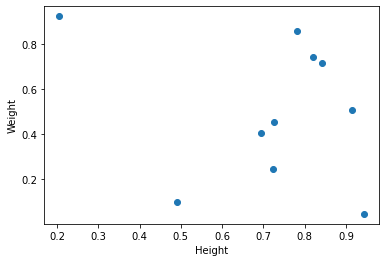

In [125]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)